In [3]:
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

Accuracy: 0.9779
Precision: 0.9763
Recall: 0.9834
F1-score: 0.9798
ROC-AUC: 0.9965


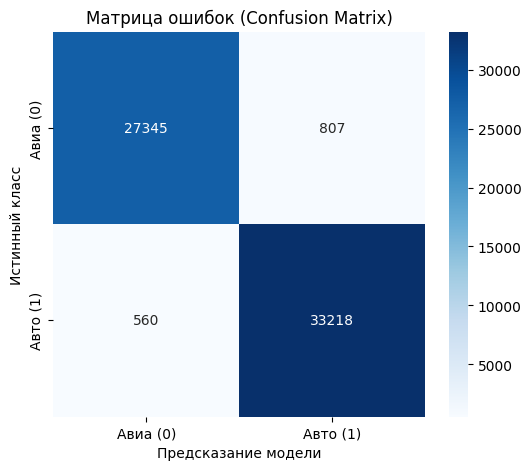

In [4]:
data = pd.read_pickle('../data/processed/data_with_embeddings.pkl')
embeddings = list(data['embeddings'])

X_train, X_test, y_train, y_test = train_test_split(embeddings, data['y'], test_size=0.2, random_state=42)

clf = LogisticRegression(random_state=42, max_iter=10000)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Авиа (0)', 'Авто (1)'], 
            yticklabels=['Авиа (0)', 'Авто (1)'])
plt.xlabel('Предсказание модели')
plt.ylabel('Истинный класс')
plt.title('Матрица ошибок (Confusion Matrix)')
plt.show()

In [ ]:
joblib.dump(clf, '../models/logreg_classifier.pkl')

print("Классификатор сохранен")

Классификатор сохранен
